Importing the dependencies


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & processing

In [44]:
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')

In [45]:
#Printing the First 5 rows in the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
#Printing the no. rows and columns in the dataset
titanic_data.shape

(891, 12)

In [47]:
#getting info about dataset
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [48]:
#let us check the missing value in dataset
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handeling missing data

In [49]:
#drop column "Cabin"
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [50]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())


In [51]:
#finding the mode value of "Embarked" Column
print(titanic_data["Embarked"].mode()[0])

S


In [52]:
# Replacing the missing "Embarked" value with the mode
titanic_data['Embarked']=titanic_data['Embarked'].fillna('S')

In [53]:
#checkig Missing value is Dataset
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [54]:
#getting some statistical data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
#finding the number of people "survived" and " Not Survivied"
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Encoding the Categorical Columns


In [56]:
# Mapping 'Sex' column to 0 for male and 1 for female
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})


In [57]:
# Mapping 'Embarked' column to numerical values (S=0, C=1, Q=2)
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [58]:
#Check if survival classes are imbalanced
print(titanic_data['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [59]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


Seprating Features & target

In [60]:
  # Droping the following data
x=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=titanic_data['Survived']
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Spliting the data in Training data and testing data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [62]:
# Printing the shapes of the datasets
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training:-Logistic Regression

In [63]:
model=LogisticRegression(max_iter=1000)

In [64]:
# Train (fit) the model on training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation :-Accuracy Score

In [78]:
# Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8089887640449438


In [79]:
# Accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


DATA VISUALIZATION


In [65]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

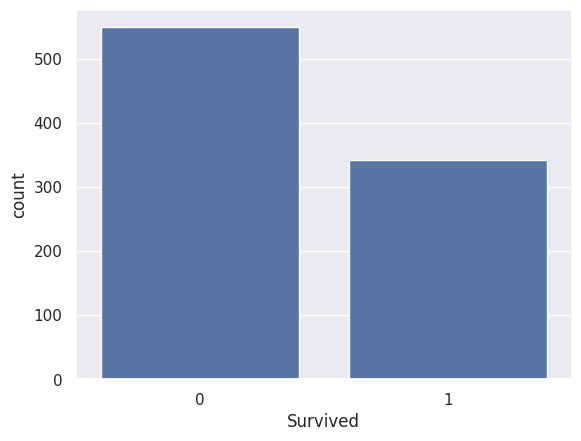

In [66]:
#making a count plot for "survived" column
sns.countplot(x='Survived', data=titanic_data)

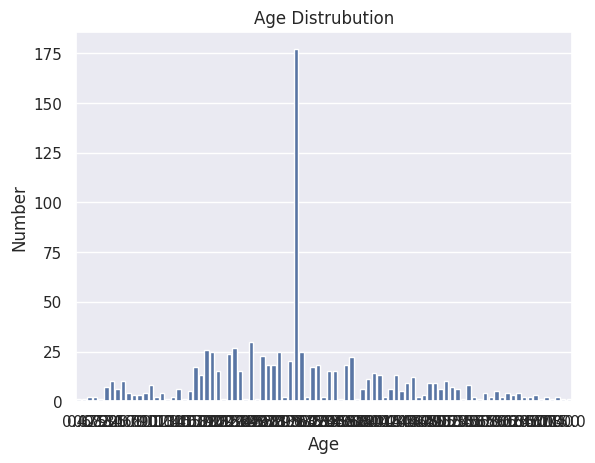

In [67]:
#making count plot for "age" column
sns.countplot(x='Age',data=titanic_data)
plt.xlabel('Age')
plt.ylabel('Number')
plt.title("Age Distrubution")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

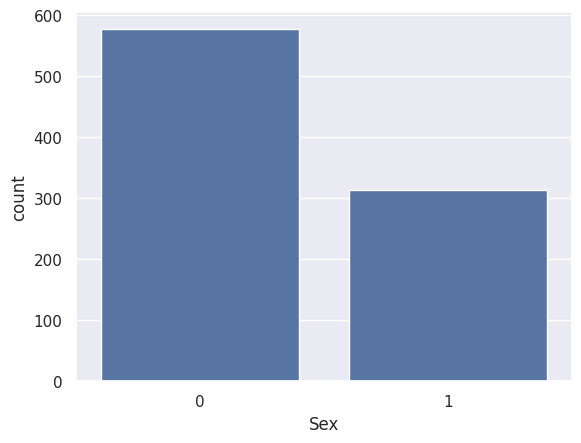

In [68]:
#making Count plot for SEX
sns.countplot(x='Sex',data=titanic_data)


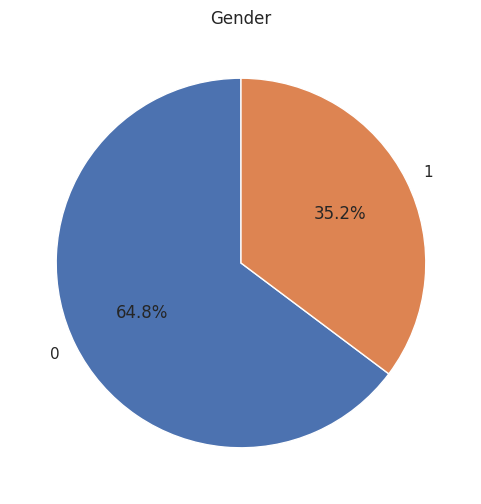

In [69]:
#Create a Pie Chart for the 'Sex' column
plt.figure(figsize=(6,6))
titanic_data['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Gender')
plt.ylabel('')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

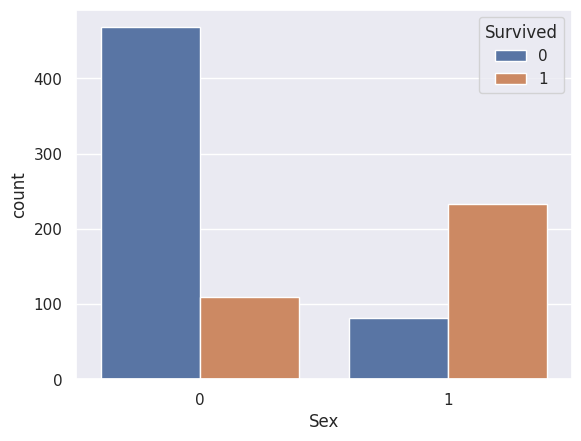

In [70]:
#number of People survived gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

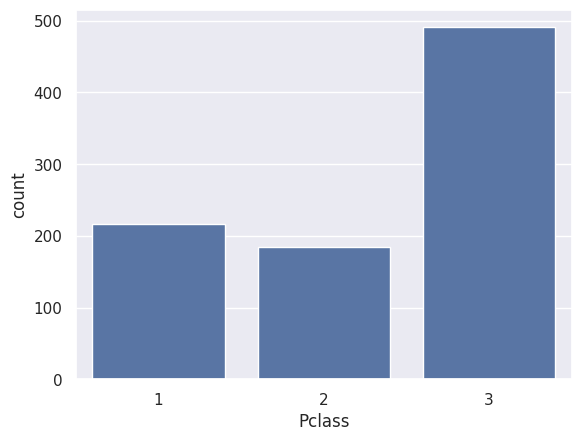

In [71]:
#Making a Count plot for "Plass" column
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

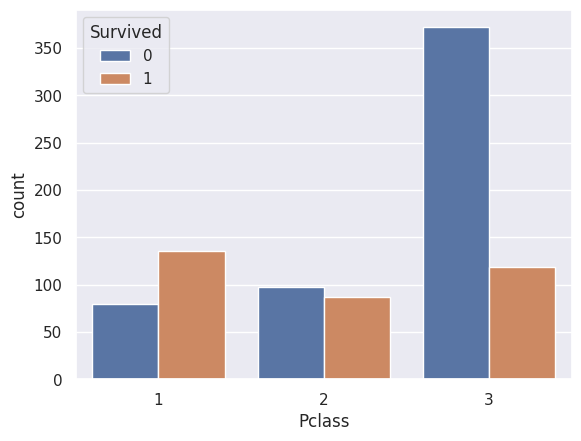

In [72]:
#making a count plot for "Survived" Column Gender Wise
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

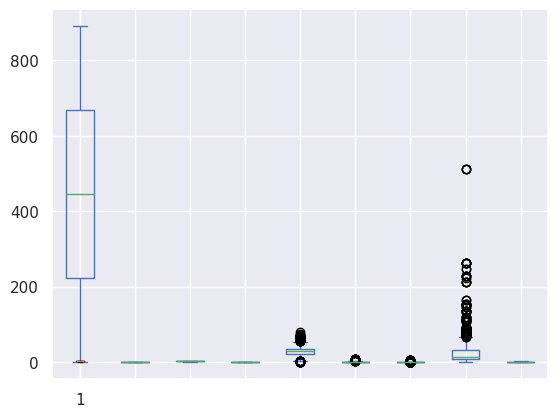

In [73]:
titanic_data.plot.box()
plt.boxplot(titanic_data['Pclass'])
plt.show()

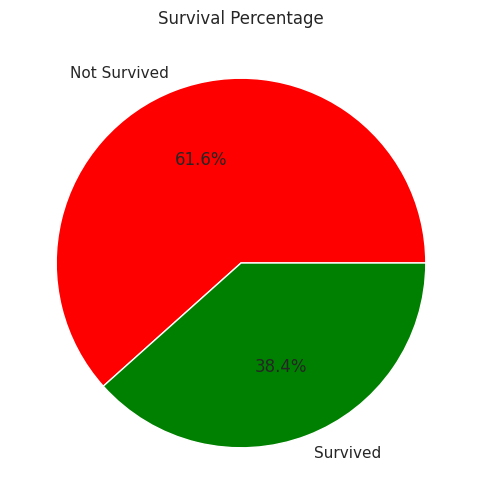

In [74]:
# Pie Chart for Survival Distribution
plt.figure(figsize=(6,6))
titanic_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'], labels=['Not Survived', 'Survived'])
plt.title("Survival Percentage")
plt.ylabel("")  # Hide y-label
plt.show()

<ipython-input-75-4066ddb4d4da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_data, palette="magma")


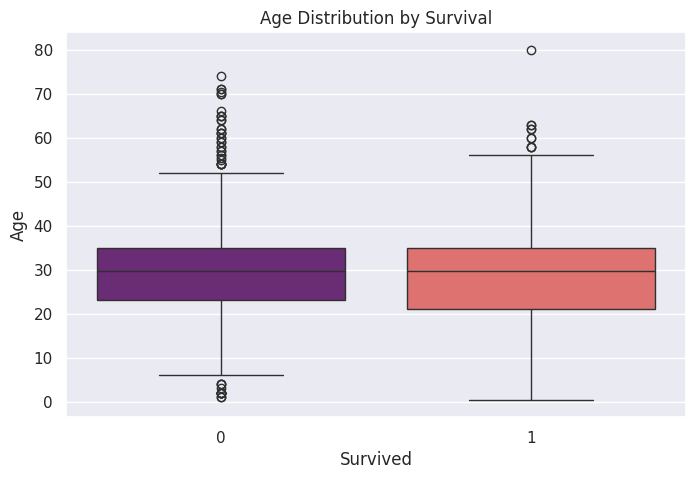

In [75]:
#Box Plot for Age vs. Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=titanic_data, palette="magma")
plt.title("Age Distribution by Survival")
plt.show()

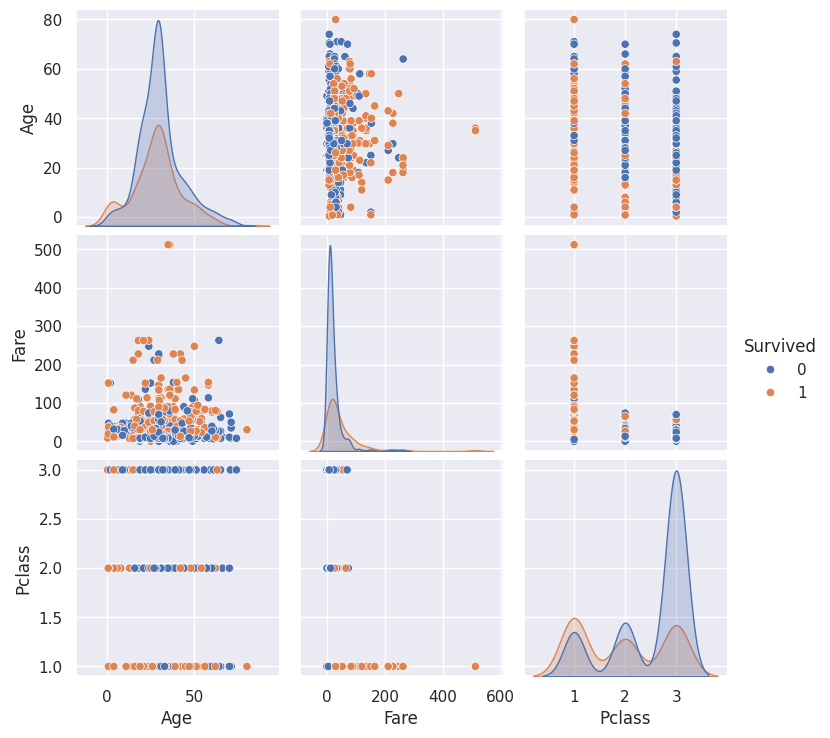

In [76]:
# Pair Plot for Feature Relationships
sns.pairplot(titanic_data[['Age', 'Fare', 'Pclass', 'Survived']], hue="Survived")
plt.show()

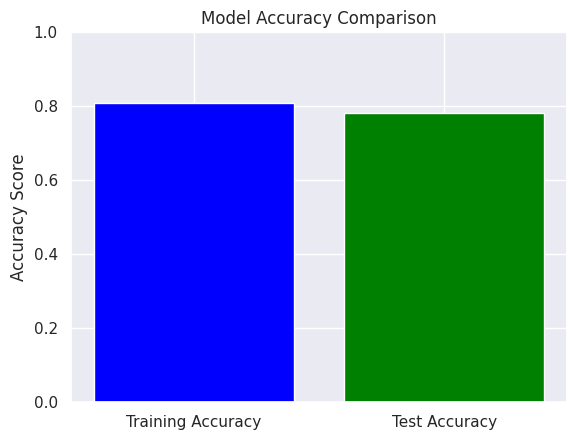

In [80]:
#Bar Chart for Accuracy Comparison
plt.bar(["Training Accuracy", "Test Accuracy"], [training_data_accuracy, test_data_accuracy], color=['blue', 'green']) # Changed variable names to training_data_accuracy and test_data_accuracy
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

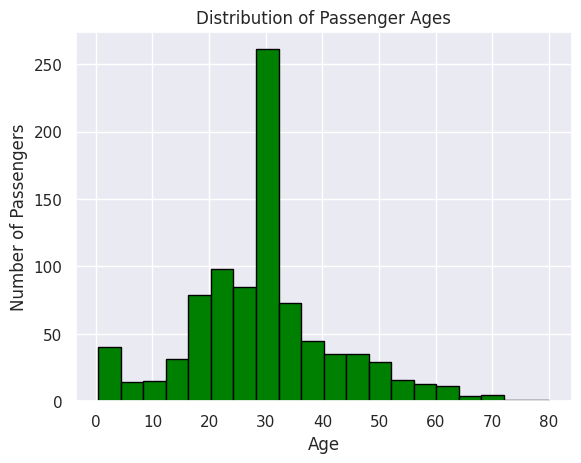

In [81]:
# Histogram of Passenger Ages
plt.hist(titanic_data["Age"].dropna(), bins=20, color='Green', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")
plt.show()

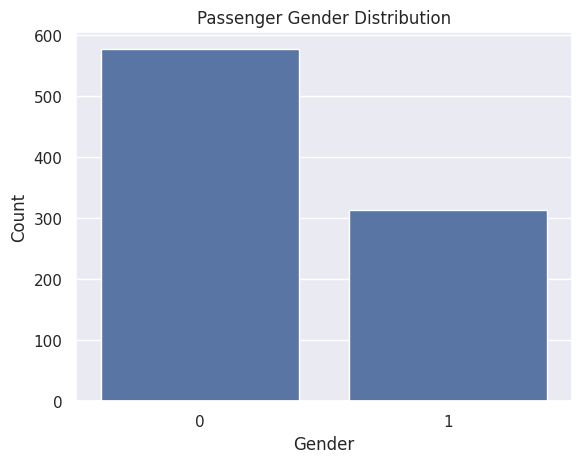

In [82]:
#Countplot for Gender Distribution
sns.countplot(x=titanic_data["Sex"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Passenger Gender Distribution")
plt.show()

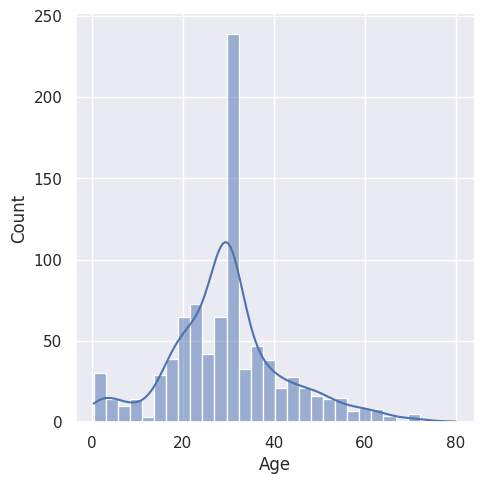

In [83]:
sns.displot(titanic_data['Age'],kde=True)

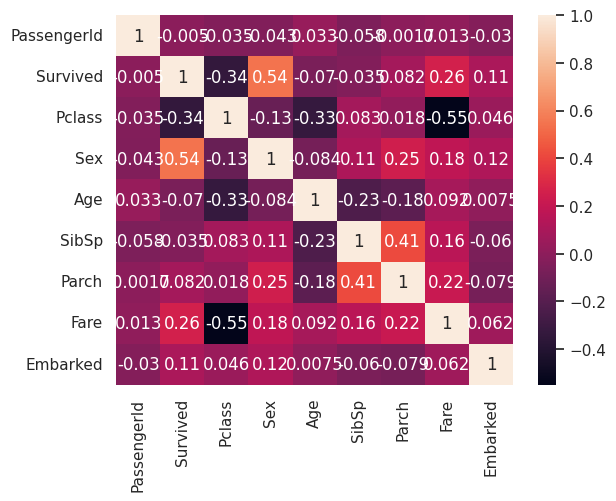

In [84]:
# Selecting only numerical features for correlation analysis
numerical_features = titanic_data.select_dtypes(include=np.number)

# Generating the heatmap using the numerical features
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

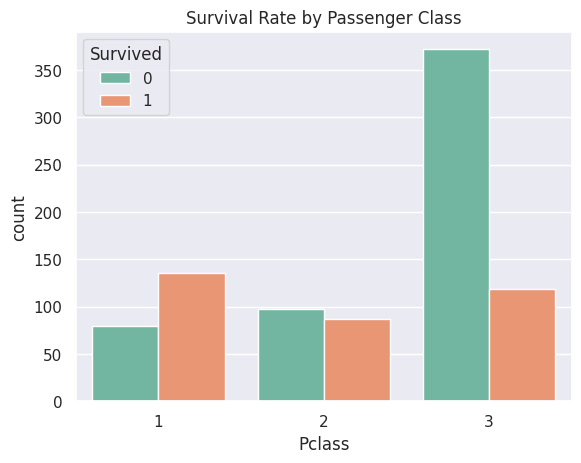

In [85]:
#Survived by Passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette="Set2")
plt.title("Survival Rate by Passenger Class")
plt.show()

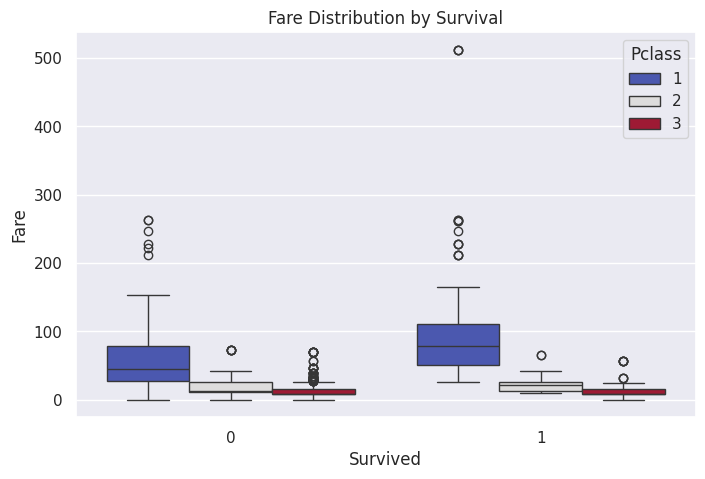

In [86]:
#Fare distribution by Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=titanic_data,hue="Pclass", palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.show()

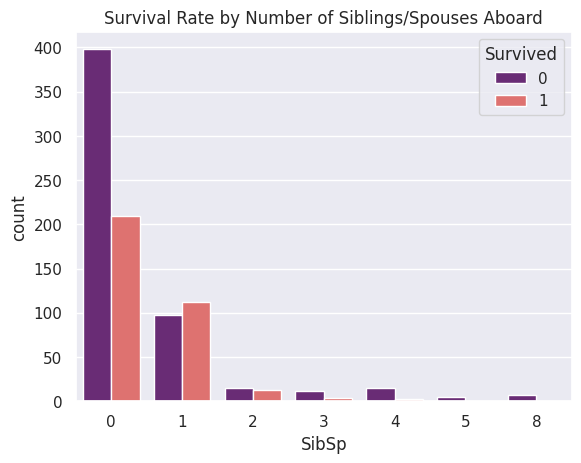

In [87]:
#Siblings/Spouses vs survival
sns.countplot(x='SibSp', hue='Survived', data=titanic_data, palette="magma")
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.show()